# Q2) Drawing 3D bounding boxes

In [163]:
%matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Given
dcar = np.array([1.38, 1.51, 4.10]) #dim of car
K = np.array([[7.2153e+02,0,6.0955e+02],[0,7.2153e+02,1.7285e+02],[0,0,1]]) #intrinsic calibration matrix
Ywc = 1.65 #distance from camera to ground

In order to draw the bounding box for the car, we first need to 
1. Extract 3D points of 8 corners of the car.
2. Then project these 8 points onto the image plane.  

### Part - 1: Extract 3D points of 8 corners of the car

We first use the pixel coordinates of a point 'A' on the road. We choose the world coordinate system coincide with the bottom of front visible tyre on the road as it becomes easy to later measure coordinates of remaining 7 points and also to find (R,t) between world frame and camera frame. We choose 'A' to be (0,0,0) of this world coordinate frame and its (u,v) is (755,267) which was measured by taking top left corner as image's coordinate system as shown below. We need to find X and Z value of t matrix now as elaborated below:

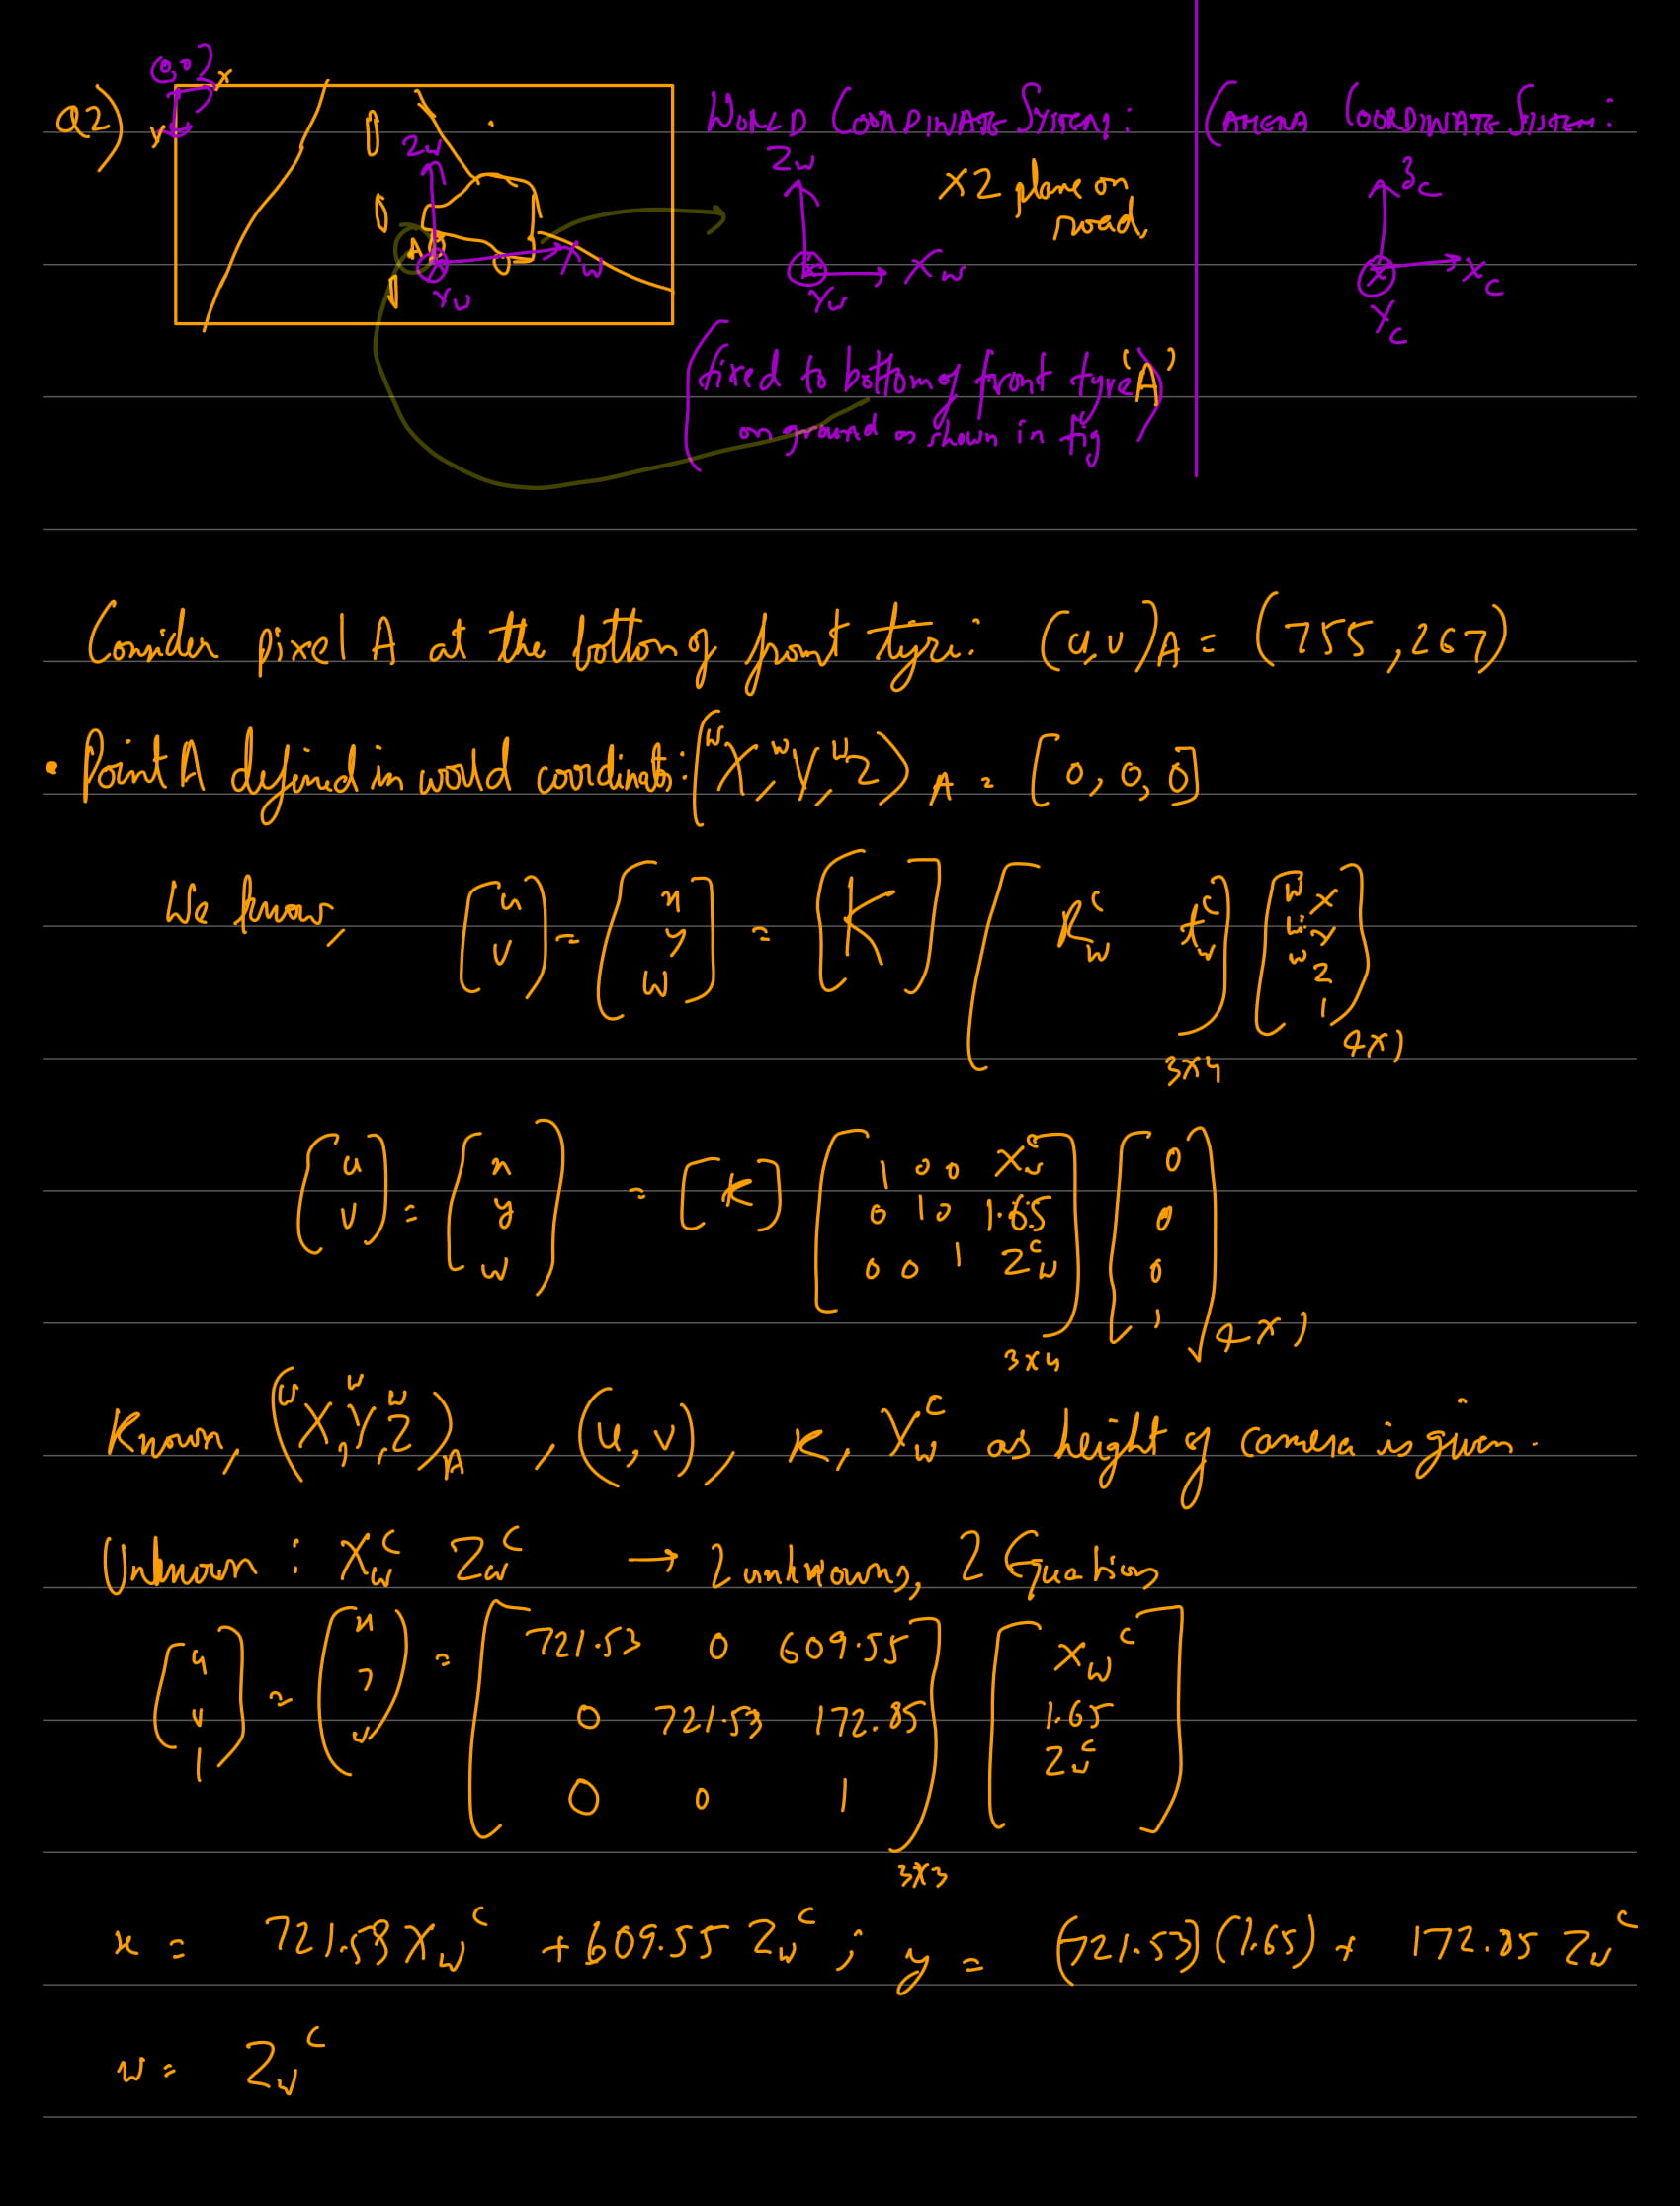

(**Please note that Xwc, Ywc and Zwc are Tx, Ty and Tz respectively.**)

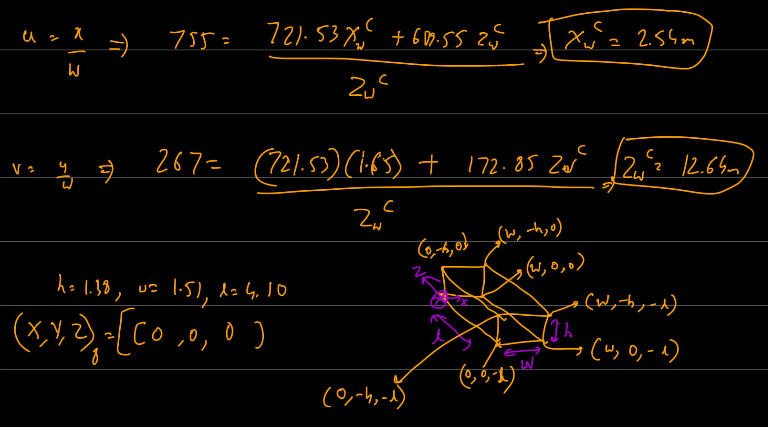

By rearranging the two equations, we get


 (**Please note that Xwc, Ywc and Zwc are Tx, Ty and Tz respectively.**)

In [164]:
Zwc = (721.53*1.65)/(267.0-172.85)
Xwc = Zwc*(755.0-609.55)/(721.53)

# As shown in the figure of cuboid in the image above, we get the remaining coordinates: 
coord_car = np.swapaxes(np.array([[0,0,0],[dcar[0],0,0],[0,-dcar[1],0],
             [0,0,-dcar[2]],[0,-dcar[1],-dcar[2]],[dcar[0],0,-dcar[2]],
             [dcar[0],-dcar[1],0],[dcar[0],-dcar[1],-dcar[2]]]),0,1)
coord_car = np.concatenate((coord_car,np.ones((1,8)))) #homogenous coordinates

print("The t matrix is [{}, {}, {}].".format(Xwc, Ywc, Zwc))

The t matrix is [2.549044078597982, 1.65, 12.644976101964948].


### Part - 2: Project these 8 points onto the image plane

This is fairly straightforward now that we have all the matrices on the right hand of the equation, we just need to find the (u,v) for each point. 

Below, RT refers to the extrinsic calibration matrix and UV refers to vector of the pixel values (u,v) for each point.

<IPython.core.display.Javascript object>


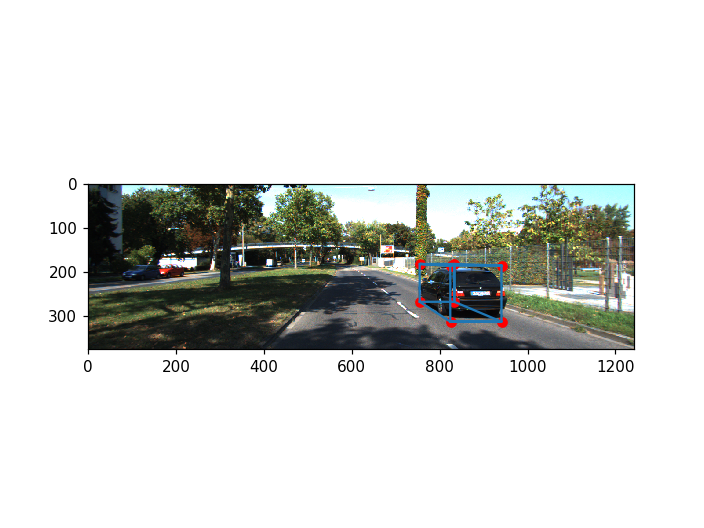

In [165]:




#print(coord_car)
R = np.eye(3)
T = np.transpose(np.array([[Xwc,Ywc,Zwc]]))

RT = np.concatenate((R,T), axis=1)

xyw = K.dot(RT).dot(coord_car[:,:])
UV = np.swapaxes(xyw/xyw[2], 0 ,1)
UV.shape

UV_line = np.array([[754.54099684, 267.03706487],[754.54099684, 180.84162975], [824.15025761, 184.67836066],
                    [824.15025761, 312.25567916], [754.54099684, 267.03706487],[833.31563291, 267.03706487],
                    [833.31563291, 180.84162975],[754.54099684, 180.84162975], [824.15025761, 184.67836066],
                    [940.74409836, 184.67836066],[940.74409836, 312.25567916], [824.15025761, 312.25567916],
                    [940.74409836, 312.25567916],[833.31563291, 267.03706487],[833.31563291, 180.84162975],
                    [940.74409836, 184.67836066]])



img=mpimg.imread('image.png')
plt.plot(UV[:,0], UV[:,1],'ro')
plt.plot(UV_line[:,0], UV_line[:,1])
imgplot = plt.imshow(img)
plt.show()